## 1. 最富有客户的资产总量

给你一个 m x n 的整数网格 accounts ，其中 accounts[i][j] 是第 i​​​​​​​​​​​​ 位客户在第 j 家银行托管的资产数量。返回最富有客户所拥有的 资产总量 。

客户的 资产总量 就是他们在各家银行托管的资产数量之和。最富有客户就是 资产总量 最大的客户。

 

示例 1：

> 输入：accounts = [[1,2,3],[3,2,1]]
>
> 输出：6
>
> 解释：
>
> 第 1 位客户的资产总量 = 1 + 2 + 3 = 6
>
> 第 2 位客户的资产总量 = 3 + 2 + 1 = 6
>
> 两位客户都是最富有的，资产总量都是 6 ，所以返回 6 。

示例 2：

>输入：accounts = [[1,5],[7,3],[3,5]]
>
>输出：10
>
>解释：
>
>第 1 位客户的资产总量 = 6
>
>第 2 位客户的资产总量 = 10 
>
>第 3 位客户的资产总量 = 8
>
>第 2 位客户是最富有的，资产总量是 10

示例 3：

>输入：accounts = [[2,8,7],[7,1,3],[1,9,5]]
>
>输出：17

### 代码

直接遍历

In [2]:
class Solution:
    def maximumWealth(self, accounts) -> int:

        res_max = 0
        for i in accounts:
            res = 0
            for j in i:
                res += j
            if res > res_max:
                res_max = res
        return res_max

代码比短大赛：

In [4]:
class Solution:
    def maximumWealth(self, accounts) -> int:
        return max(map(sum, accounts))

## 2. 矩阵对角线元素的和

给你一个正方形矩阵 mat，请你返回矩阵对角线元素的和。

请你返回在矩阵主对角线上的元素和副对角线上且不在主对角线上元素的和。

 

示例  1：

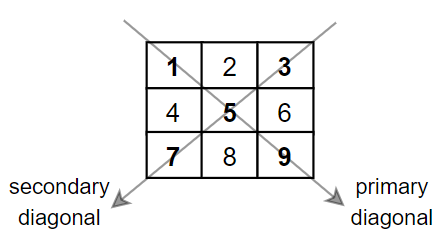


输入：mat = \[\[1,2,3\],

         [4,5,6],
            
         [7,8,9]]
输出：25

解释：对角线的和为：1 + 5 + 9 + 3 + 7 = 25

请注意，元素 mat[1][1] = 5 只会被计算一次。

示例  2：

输入：mat = \[\[1,1,1,1\],

         [1,1,1,1],
         
         [1,1,1,1],
         
         [1,1,1,1]]
输出：8

示例 3：

输入：mat = [[5]]

输出：5

### 测试数据

In [5]:
mat = [[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]]

### 代码

循环一遍。

In [8]:
class Solution1:
    def diagonalSum(self, mat) -> int:
        m = len(mat)
        sum = 0
        for i in range(m):
            sum += mat[i][i] + mat[i][m - i - 1]
        if m % 2 == 1:
            sum -= mat[m // 2][m // 2]
        return sum
    

solution1 = Solution1()
print(solution1.diagonalSum(mat))

8


改进：可以通过按位与 `&` 来判断奇偶性：

In [10]:
class Solution2:
    def diagonalSum(self, mat) -> int:
        m = len(mat)
        sum = 0
        for i in range(m):
            sum += mat[i][i] + mat[i][m - i - 1]
        if m % 2 == 1:
            sum -= mat[m // 2][m // 2]
        return sum - mat[m // 2][m // 2] * (1 & m)
    

solution2 = Solution2()
print(solution2.diagonalSum(mat))

8


## 3. 螺旋矩阵

给你一个 m 行 n 列的矩阵 matrix ，请按照 顺时针螺旋顺序 ，返回矩阵中的所有元素。

 

示例 1：

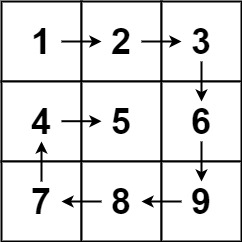

> 输入：matrix = [[1,2,3],[4,5,6],[7,8,9]]
> 
> 输出：[1,2,3,6,9,8,7,4,5]

示例 2：

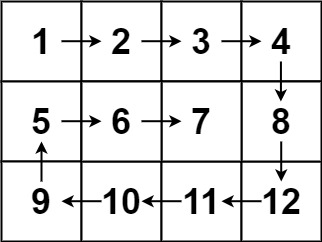

> 输入：matrix = [[1,2,3,4],[5,6,7,8],[9,10,11,12]]
> 
> 输出：[1,2,3,4,8,12,11,10,9,5,6,7]

### 代码
根据螺旋的流程写代码即可：

In [12]:
class Solution:
    def spiralOrder(self, matrix):
        if not matrix: return []
        l, r, t, b, res = 0, len(matrix[0]) - 1, 0, len(matrix) - 1, []
        while True:
            for i in range(l, r + 1): res.append(matrix[t][i]) # left to right
            t += 1
            if t > b: break
            for i in range(t, b + 1): res.append(matrix[i][r]) # top to bottom
            r -= 1
            if l > r: break
            for i in range(r, l - 1, -1): res.append(matrix[b][i]) # right to left
            b -= 1
            if t > b: break
            for i in range(b, t - 1, -1): res.append(matrix[i][l]) # bottom to top
            l += 1
            if l > r: break
        return res

## 5. 矩阵置零

给定一个 m x n 的矩阵，如果一个元素为 0 ，则将其所在行和列的所有元素都设为 0 。请使用 原地 算法。

 

示例 1：

> 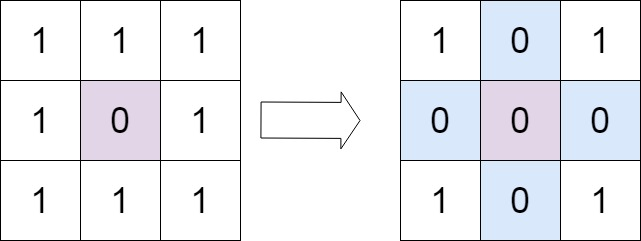
> 
> 输入：matrix = [[1,1,1],[1,0,1],[1,1,1]]
> 
> 输出：[[1,0,1],[0,0,0],[1,0,1]]

示例 2：

> 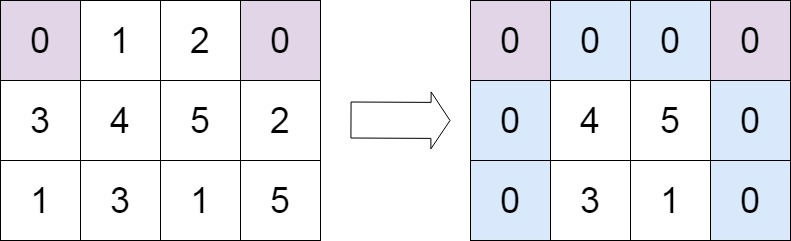
> 
> 输入：matrix = [[0,1,2,0],[3,4,5,2],[1,3,1,5]]
> 
> 输出：[[0,0,0,0],[0,4,5,0],[0,3,1,0]]

### 测试数据

In [13]:
matrix = [[0,1,2,0],[3,4,5,2],[1,3,1,5]]

### 代码

两种思路：
1. 迭代两次，第一次统计矩阵中的 0 的位置，用集合存储，第二次根据集合中的位置置零。
2. 用matrix第一行和第一列记录该行该列是否有0,作为标志位。但是对于第一行,和第一列要设置一个标志位,为了防止自己这一行(一列)也有0的情况。


In [14]:
class Solution1:
    def setZeroes(self, matrix) -> None:
        """
        Do not return anything, modify matrix in-place instead.
        """
        row = list()
        col = list()
        # row_zero = set()
        # col_zero = set()
        m, n = len(matrix), len(matrix[0])
        for i in range(m):
            for j in range(n):
                if matrix[i][j] == 0:
                    # row_zero.add(i)
                    # col_zero.add(j)
                    row.append(i)
                    col.append(j)
        
        for data in row:
            for j in range(n):
                matrix[data][j] = 0
        for data in col:
            for i in range(m):
                matrix[i][data] = 0

In [17]:
# 作者：powcai
# 链接：https://leetcode.cn/problems/set-matrix-zeroes/solutions/6594/o1kong-jian-by-powcai/
class Solution2:
    def setZeroes(self, matrix) -> None:
        """
        Do not return anything, modify matrix in-place instead.
        """
        row = len(matrix)
        col = len(matrix[0])
        row0_flag = False
        col0_flag = False
        # 找第一行是否有0
        for j in range(col):
            if matrix[0][j] == 0:
                row0_flag = True
                break
        # 第一列是否有0
        for i in range(row):
            if matrix[i][0] == 0:
                col0_flag = True
                break

        # 把第一行或者第一列作为 标志位
        for i in range(1, row):
            for j in range(1, col):
                if matrix[i][j] == 0:
                    matrix[i][0] = matrix[0][j] = 0
        #print(matrix)
        # 置0
        for i in range(1, row):
            for j in range(1, col):
                if matrix[i][0] == 0 or matrix[0][j] == 0:
                    matrix[i][j] = 0

        if row0_flag:
            for j in range(col):
                matrix[0][j] = 0
        if col0_flag:
            for i in range(row):
                matrix[i][0] = 0

In [19]:
solution2 = Solution2()
solution2.setZeroes(matrix)
print(matrix)

[[0, 0, 0, 0], [0, 4, 5, 0], [0, 3, 1, 0]]


这种不新开辟存储空间，在原始数据运算的思路常有。